# Free Fall Simulation with Euler and Runge-Kutta
This notebook simulates the free fall with air resistance, comparing Euler and Runge-Kutta methods.

In [7]:
import matplotlib.pyplot as plt

times = []
vel_euler = []
pos_euler = []
vel_rk = []
pos_rk = []

vel_euler_err = []
pos_euler_err = []

Define parameters and initial conditions

In [13]:
class Parameters:
    def __init__(self):
        self.g = 9.81
        self.cw = 1.1
        self.A = 0.35
        self.rho = 1.20
        self.m = 0.40
        self.dt = 0.1
        self.t_max = 25.0
        self.v0 = 0.0
        self.x0 = 100.0

p = Parameters()
v0_eu = p.v0
x0_eu = p.x0
v0_rk = p.v0
x0_rk = p.x0
t = 0.0

Define generic Euler and Runge-Kutta step functions

In [14]:
def euler_step(f, x_k, dx_k, params=Parameters()):
    dt = params.dt
    return x_k + dt * f(x_k, dx_k, params)

def rk4_step(f, x_k, dx_k, params=Parameters()):
    x = x_k
    dt = params.dt

    k1 = f(x, dx_k, params)
    k2 = f(x + 0.5 * dt * k1, dx_k + 0.5 * (k1 - dx_k), params)
    k3 = f(x + 0.5 * dt * k2, dx_k + 0.5 * (k2 - k1), params)
    k4 = f(x + dt * k3, dx_k + (k3 - dx_k), params)

    kg = (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
    return x + dt * kg

Define the differential equations for free fall with air resistance

In [15]:
def freefall_firder(x, dx, params):
    v = x
    g = params.g
    rho = params.rho
    Af = params.A
    cw = params.cw
    m = params.m
    return rho * cw * Af * v * v / (2 * m) - g

def freefall_secder(x, dx, params):
    return dx

Main simulation loop

In [16]:
t_max = p.t_max
tmp = 0.0

while t <= t_max and x0_rk >= 0:
    times.append(t)
    vel_euler.append(v0_eu)
    pos_euler.append(x0_eu)

    vel_rk.append(v0_rk)
    pos_rk.append(x0_rk)

    v0_eu = euler_step(freefall_firder, v0_eu, tmp, p)
    x0_eu = euler_step(freefall_secder, x0_eu, v0_eu, p)

    v0_rk = rk4_step(freefall_firder, v0_rk, tmp, p)
    x0_rk = rk4_step(freefall_secder, x0_rk, v0_rk, p)

    t += p.dt

print('Simulation abgeschlossen.')
print(f'Letzte Position Euler: {x0_eu:.2f} m')
print(f'Letzte Geschwindigkeit Euler: {v0_eu:.2f} m/s')
print(f'Letzte Position Runge-Kutta: {x0_rk:.2f} m')
print(f'Letzte Geschwindigkeit Runge-Kutta: {v0_rk:.2f} m/s')
print(f'Simulationsschritte: {len(times)} and t_sim={p.dt * len(times)} s')

Simulation abgeschlossen.
Letzte Position Euler: -0.51 m
Letzte Geschwindigkeit Euler: -4.12 m/s
Letzte Position Runge-Kutta: -0.39 m
Letzte Geschwindigkeit Runge-Kutta: -4.12 m/s
Simulationsschritte: 492 and t_sim=49.2 s


Plot results

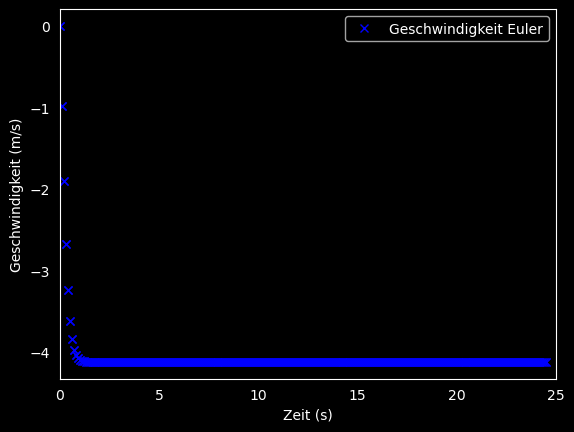

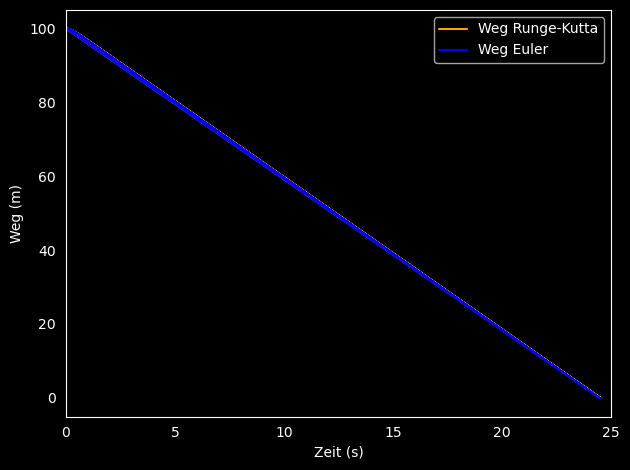

In [17]:
fig2, ax2 = plt.subplots(1, 1)
ax2.plot(times, vel_euler, 'x', label='Geschwindigkeit Euler', color='blue')
ax2.set_ylabel('Geschwindigkeit (m/s)')
ax2.set_xlabel('Zeit (s)')
ax2.set_xlim(0, t_max)
ax2.grid()
ax2.legend()

fig3, ax3 = plt.subplots(1, 1)
ax3.plot(times, pos_rk, '-', label='Weg Runge-Kutta', color='orange')
ax3.plot(times, pos_euler, '-', label='Weg Euler', color='blue')
ax3.set_ylabel('Weg (m)')
ax3.set_xlabel('Zeit (s)')
ax3.set_xlim(0, t_max)
ax3.grid()
ax3.legend()

plt.tight_layout()
plt.show()